---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 4
---

Please write your full name here

- **Name** : "Andrew Mushen"
- **BN** : 15


# Assignment_3 SVM

In [23]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC



# Part 2: SVM

### Use the following function to plot the classification regions

In [24]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, X_train=None, y_train=None,
                                      title=None, target_names=None, plot_decision_regions=True):

    numClasses = np.amax(y) + 1
    #['light yellow' , 'white ' ,'','']
    color_list_light = ['#c4caff', '#c4ffff', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#c44bff', '#4fc9ff', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h),
                         np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                s=plot_symbol_size, edgecolor='black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_train is not None):
        #plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, s=plot_symbol_size, marker='s', edgecolor='black')
        train_score = clf.score(X_train, y_train)
        title = title + \
            "\n Train score = {:.2f} ".format(train_score)

    if (X_test is not None):

        #plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,s=plot_symbol_size, marker='s', edgecolor='white')
        test_score = clf.score(X_test, y_test)
        title = title + \
            "Test score = {:.2f} ".format(test_score)

    if (target_names is not None):
        from matplotlib import patches as mpatches
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(
                color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()


### Use the following dataset in questions 1, 2, and 3.

In [25]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=0 and 25% of the data for testing)

In [26]:
import pandas as pd

df = pd.DataFrame(X,columns=['feature_1', 'feature_2'])
df["target"] = y
df.head()

,feature_1,feature_2,target
0,0.371640,-0.922762,0
1,-0.161718,0.513867,0
2,-1.636509,2.233900,0
3,0.620419,-2.189414,0
4,-0.987185,1.932995,0


In [27]:
np.unique(df.target)


array([0, 1])

In [28]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X, y, train_size=0.75, random_state=0)



#### Question 2
1. Train an SVM classifier using linear kernel.
2. Plot the classification regions using the training dataset.

In [29]:
from sklearn.svm import SVC

model_q2 = SVC()
model_q2.fit(xtrain, ytrain)

print("model_q2 train acc =", model_q2.score(xtrain, ytrain))
print("model_q2 test acc =", model_q2.score(xtest, ytest))




model_q2 train acc = 0.84
model_q2 test acc = 0.76


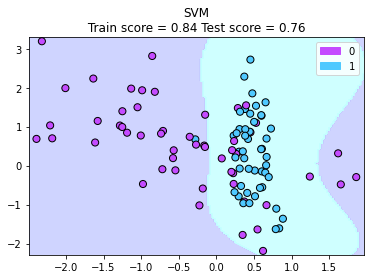

In [30]:
plot_class_regions_for_classifier(
    model_q2, X, y, X_test=xtest, y_test=ytest, y_train=ytrain, X_train=xtrain,
    title='SVM',target_names= ['0','1'])



#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00001.
2. Train another SVM classifier using linear kernel with C=100
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

In [31]:
model_q3_small_C = SVC(C=0.00001)
model_q3_small_C.fit(xtrain, ytrain)

model_q3_Large_C = SVC(C=100)
model_q3_Large_C.fit(xtrain, ytrain)


SVC(C=100)

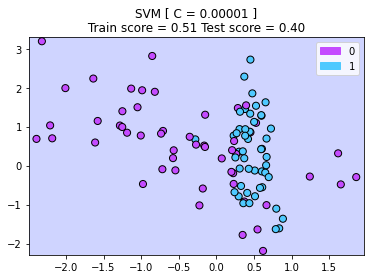

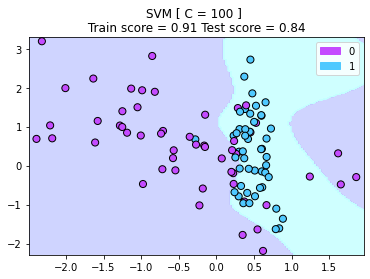

In [32]:
plot_class_regions_for_classifier(
    model_q3_small_C, X, y, X_test=xtest, y_test=ytest, y_train=ytrain, X_train=xtrain,
    title='SVM [ C = 0.00001 ]', target_names=['0', '1'])

plot_class_regions_for_classifier(
    model_q3_Large_C, X, y, X_test=xtest, y_test=ytest, y_train=ytrain, X_train=xtrain,
    title='SVM [ C = 100 ] ', target_names=['0', '1'])


### ***when C was 100 SVC performed much better - train&test scores raised up to 0.91, 0.84***

### ***when C was 0.00001 SVC performed much worse - train&test scores dropped to 0.51, 0.4***


#### *Regularization parameter. The strength of the regularization is inversely proportional to C*

  - ##### so as C goes up the strength of regularization weaken to a point that it's effective 
 
   - ##### but when C goes down the strength of regularization strengthen to a point that svm misses up the prediction by canceling/removing features that have important weights on prediction and classify all data according to few features and that will cause a clustring in one class like seen aboce

### Use the fruits dataset in questions 4, 5, 6.

In [33]:
import pandas as pd
fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=0, and 25% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm

In [34]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [35]:
X_fruits = fruits.iloc[:,[4,5]]
y_fruits = fruits['fruit_label']
#y_fruits = fruits.iloc[:,[0]]
#y_fruits = fruits.fruit_label
X_fruits.head()

,width,height
0,8.4,7.3
1,8.0,6.8
2,7.4,7.2
3,6.2,4.7
4,6.0,4.6


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

xtrain, xtest, ytrain, ytest = train_test_split(
    X_fruits, y_fruits, random_state=0, test_size=0.25)

fruit_SVC_model = SVC(kernel='linear',).fit(xtrain, ytrain)

print("train score =", fruit_SVC_model.score(xtrain, ytrain))
print("test score =", fruit_SVC_model.score(xtest, ytest))


train score = 0.7954545454545454
test score = 0.6


In [37]:
fruits_label, fruits_count = np.unique(fruits.fruit_name, return_counts=True)
dict(zip(fruits_label,fruits_count))
fruits_label

array(['apple', 'lemon', 'mandarin', 'orange'], dtype=object)

#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

### ***our model is linear [one vs all]***

### ***the number of models trained in given by this relation [(#of classes)C2]***


  - ##### our data has 4 classes so it will only be trained 4 times 
 

In [38]:
print("the model coefficient", fruit_SVC_model.coef_)
print("the model intercepts", fruit_SVC_model.intercept_)
 

the model coefficient [[ 0.24999969  0.74999906]
 [ 0.17846357 -1.0247669 ]
 [ 1.55993033 -1.10094816]
 [-0.31796512 -0.73131977]
 [ 0.05076138 -0.71065935]
 [ 1.89213469 -1.13258578]]
the model intercepts [-6.07499311  7.02661228 -2.10267889  6.40858653  4.02537775 -3.82649862]


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


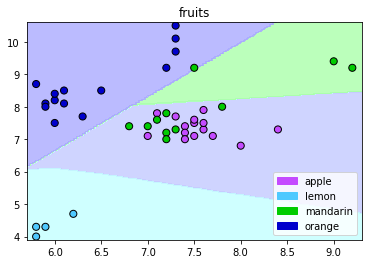

In [39]:
plot_class_regions_for_classifier(fruit_SVC_model, xtrain.to_numpy(),
                                  ytrain, title='fruits', target_names=fruits_label)


from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)### Use the breast cancer dataset in question 7, 8, and9.

In [40]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 0, and 25% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [41]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC

xtrain, xtest, ytrain, ytest = train_test_split(
    X_cancer, y_cancer, random_state=0, test_size=0.25)

model = SVC()

parameters = {
    'kernel': ('poly', 'rbf'),
    'C': [0.01, 0.1, 0.5, 1, 10]
}

model_grid = GridSearchCV(
    model,
    parameters,
    cv=10,
    verbose=1,
    n_jobs=-1
)

model_grid.fit(xtrain, ytrain)

print("the best paramater are ", model_grid.best_params_)



Fitting 10 folds for each of 10 candidates, totalling 100 fits
the best paramater are  {'C': 10, 'kernel': 'rbf'}


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [42]:
best_model = SVC(
    C=model_grid.best_estimator_.get_params()['C'],
    kernel=model_grid.best_estimator_.get_params()['kernel']
)

best_model.fit(xtrain, ytrain)

print("best_model train acc = ", best_model.score(xtrain, ytrain))
print("best_model test acc = ", best_model.score(xtest, ytest))

question_8_score = best_model.score(xtest, ytest)


best_model train acc =  0.9154929577464789
best_model test acc =  0.9370629370629371


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [43]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [44]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df["cancer_type"] = cancer.target


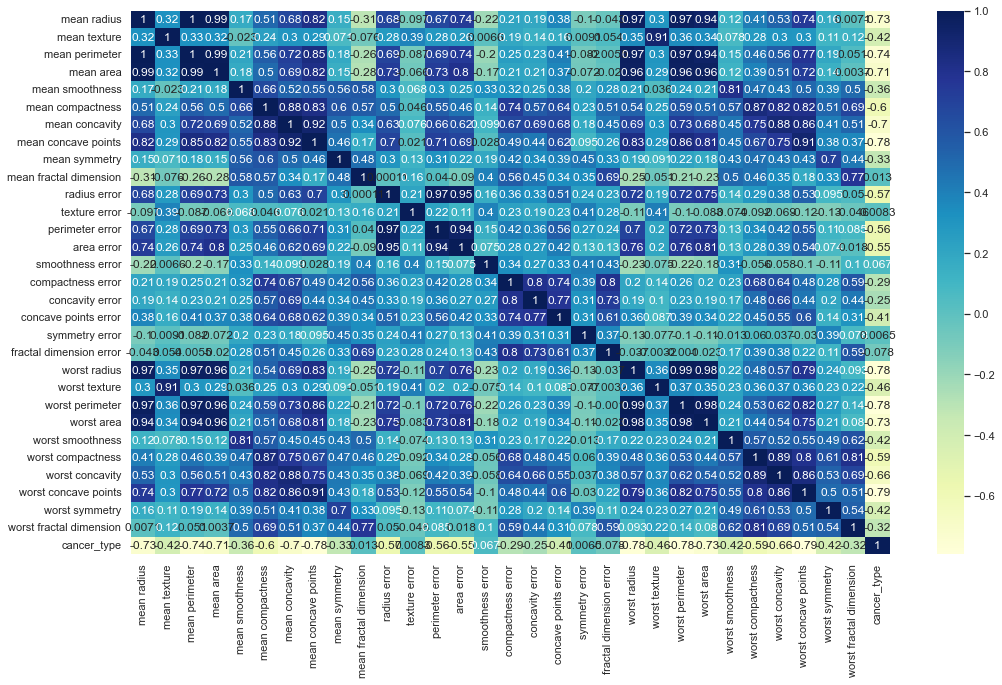

In [45]:
import seaborn as sns

sns.set(rc={'figure.figsize':(17,10)})
dataplot = sns.heatmap(cancer_df.corr(), cmap = "YlGnBu", annot = True)

In [46]:
from sklearn.feature_selection import SelectKBest

x = cancer_df[cancer_df.columns[:-1]]
y = cancer_df[cancer_df.columns[-1]]
fit_feature = SelectKBest()
featrues_weights = fit_feature.fit(x, y)




In [47]:
score_col = pd.DataFrame(featrues_weights.scores_, columns=['score value'])
name_col = pd.DataFrame(x.columns)

top_features = pd.concat([name_col, score_col],
                         axis=1).nlargest(7, 'score value')

top_features

,0,score value
27,worst concave points,964.385393
22,worst perimeter,897.944219
7,mean concave points,861.676020
20,worst radius,860.781707
2,mean perimeter,697.235272
23,worst area,661.600206
0,mean radius,646.981021


In [48]:
worst_features = pd.concat([name_col, score_col],
                         axis=1).nsmallest(7, 'score value')

worst_features

,0,score value
18,symmetry error,0.024117
11,texture error,0.039095
9,mean fractal dimension,0.093459
14,smoothness error,2.557968
19,fractal dimension error,3.468275
16,concavity error,39.014482
15,compactness error,53.247339


In [49]:
values, values_count = np.unique(cancer_df["worst concave points"], return_counts=True)
values[np.where(values_count > 10)]

k=values[np.where(values_count > 10)]
k[0]

new_df =cancer_df[cancer_df["worst concave points"] != k[0] ]


x_feature_selected = new_df.drop(
    ['symmetry error',
     'texture error',
     'mean fractal dimension',
     'smoothness error',
     'fractal dimension error',
     'concavity error',
     'compactness error',
     ], axis=1)

y_feature_selected = new_df[new_df.columns[-1]]


xtrain, xtest, ytrain, ytest = train_test_split(
    x_feature_selected, y_feature_selected, random_state = 0, test_size = 0.25)

model=SVC()

parameters={
    'kernel': ('poly', 'rbf'),
    'C': [0.01, 0.1, 0.5, 1, 10]
}

model_grid = GridSearchCV(
    model,
    parameters,
    cv = 10,
    verbose = 1,
    n_jobs = -1
)

model_grid.fit(xtrain, ytrain)

print("the best paramater are ", model_grid.best_params_)

feature_reduced_model=SVC(
    C = model_grid.best_estimator_.get_params()['C'],
    kernel = model_grid.best_estimator_.get_params()['kernel']
)

feature_reduced_model.fit(xtrain, ytrain)

print("best_model train acc = ", feature_reduced_model.score(xtrain, ytrain))
print("best_model test acc = ", feature_reduced_model.score(xtest, ytest))


feature_reduced_model.score(xtest, ytest) > question_8_score


Fitting 10 folds for each of 10 candidates, totalling 100 fits
the best paramater are  {'C': 10, 'kernel': 'rbf'}
best_model train acc =  0.9064748201438849
best_model test acc =  0.9424460431654677


True